In [4]:
from src.backtest.engine import Backtester
from src.backtest.benchmark import compare_to_buy_and_hold
from src.lib.data import DataFeed, DataFeedConfig
from src.strategies.reversion_rsi import MR_RSI 
from src.execution.simbroker import SimBroker, SimBrokerConfig

[*********************100%***********************]  1 of 1 completed
/home/nand/Documents/personal-projects/trading-algo/scripts/src/backtest/benchmark.py:42: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  base = float(close.iloc[0])


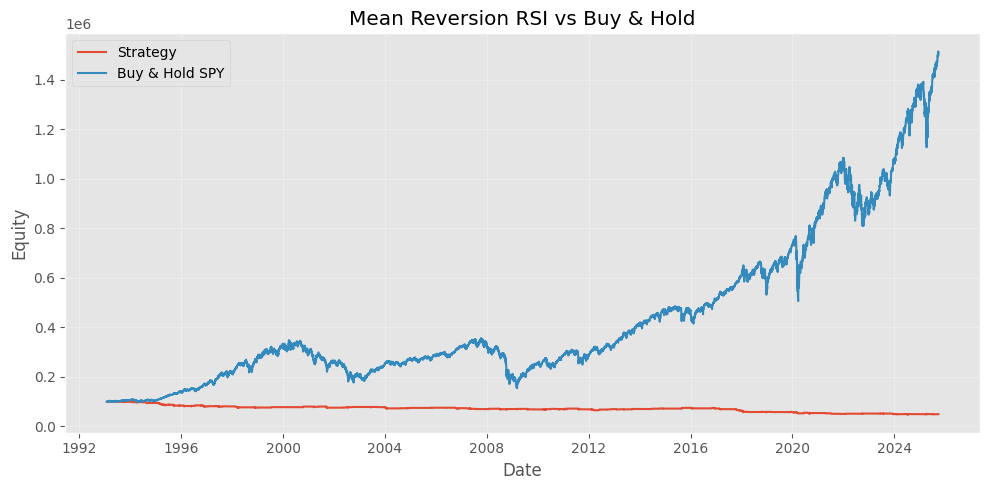

Strategy metrics: {'sharpe': -0.3959341684701306, 'sortino': -0.5689916125592817, 'omega': 0.8033096446079533, 'cagr': -0.02128741803559253, 'calmar': -0.04085293674176631, 'max_drawdown': -0.521074364130821}
Benchmark metrics: {'sharpe': 0.44392612505709234, 'sortino': 0.6189880858833106, 'omega': 1.0876433047753182, 'cagr': 0.08666748947445968, 'calmar': 0.15347556316454855, 'max_drawdown': -0.5646989506827174}


In [8]:
symbol = "SPY"

feed = DataFeed(DataFeedConfig(
    symbols=[symbol], 
    start="1990-01-01"))


strat = MR_RSI(
    vol_target_ann=0.15, 
    alpha_window=14, 
    vol_window=30, 
    symbol=symbol)
    
broker = SimBroker(SimBrokerConfig(
    commission_per_order=0.50,  # dollars per order
    slippage_bps=15.0           # one-way bps added to price
))
bt = Backtester(
    feed, 
    strat, 
    broker=broker)

cmp = compare_to_buy_and_hold(
    bt, 
    symbol=symbol, 
    title="Mean Reversion RSI vs Buy & Hold", 
    show=True,
    benchmark_commission=0.50,
    benchmark_slippage_bps=15.0,)

print("Strategy metrics:", cmp.strategy_metrics)
print("Benchmark metrics:", cmp.benchmark_metrics)